# Yap-470 Proje: Futbol Maçı Tahmin Etme

* İsim: Mehmet Furkan Koç
* No: 231211028

**Dataset İsimlendirme**

**Ev sahibi takımın maçı kazanıp kazanamayacağını tahmin etmek için bir tahmin sistemi oluşturuldu.**

Önemli veriler:
* Div = Lig Bölümü
* Date = Maç Tarihi (gg/aa/yy)
* Time = Maç Başlama Saati
* HomeTeam = Ev Sahibi Takım
* AwayTeam = Deplasman Takımı
* FTHG ve HG = Maç Sonu Ev Sahibi Takım Golleri
* FTAG ve AG = Maç Sonu Deplasman Takımı Golleri
* FTR ve Res = Maç Sonu Sonuç (H=Ev Sahibi Kazandı, D=Beraberlik, A=Deplasman Kazandı)
* HTHG = İlk Yarı Ev Sahibi Takım Golleri
* HTAG = İlk Yarı Deplasman Takımı Golleri
* HTR = İlk Yarı Sonuç (H=Ev Sahibi Kazandı, D=Beraberlik, A=Deplasman Kazandı)

* Maç İstatistikleri:

* Attendance = Seyirci Katılımı
* Referee = Maç Hakemi
* HS = Ev Sahibi Takım Şutları
* AS = Deplasman Takımı Şutları
* HST = Ev Sahibi Takım İsabetli Şutları
* AST = Deplasman Takımı İsabetli Şutları
* HHW = Ev Sahibi Takım Direğe Çarpan Şutlar
* AHW = Deplasman Takımı Direğe Çarpan Şutlar
* HC = Ev Sahibi Takım Kornerleri
* AC = Deplasman Takımı Kornerleri
* HF = Ev Sahibi Takım Faulleri
* AF = Deplasman Takımı Faulleri
* HFKC = Ev Sahibi Takım Verilen Serbest Vuruşlar
* AFKC = Deplasman Takımı Verilen Serbest Vuruşlar
* HO = Ev Sahibi Takım Ofsaytları
* AO = Deplasman Takımı Ofsaytları
* HY = Ev Sahibi Takım Sarı Kartları
* AY = Deplasman Takımı Sarı Kartları
* HR = Ev Sahibi Takım Kırmızı Kartları
* AR = Deplasman Takımı Kırmızı Kartları
* HBP = Ev Sahibi Takım Kart Puanları (10 = sarı, 25 = kırmızı)
* ABP = Deplasman Takımı Kart Puanları (10 = sarı, 25 = kırmızı)

### Dataseti Ekleme

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import itertools

%matplotlib inline

c:\Users\GS65\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
folder='C:/Users/GS65/Desktop/archive (1)/Datasets/'
raw_data_1 = pd.read_csv(folder +'2000.csv')
raw_data_2 = pd.read_csv(folder +'2001.csv')
raw_data_3 = pd.read_csv(folder +'2002.csv')
raw_data_4 = pd.read_csv(folder +'2003.csv')
raw_data_5 = pd.read_csv(folder +'2004.csv')
raw_data_6 = pd.read_csv(folder +'2005.csv')
raw_data_7 = pd.read_csv(folder +'2006.csv')
raw_data_8 = pd.read_csv(folder +'2007.csv')
raw_data_9 = pd.read_csv(folder +'2008.csv')
raw_data_10 = pd.read_csv(folder +'2009.csv')
raw_data_11 = pd.read_csv(folder +'2010.csv')
raw_data_12 = pd.read_csv(folder +'2011.csv')
raw_data_13 = pd.read_csv(folder +'2012.csv')
raw_data_14 = pd.read_csv(folder +'2013.csv')
raw_data_15 = pd.read_csv(folder +'2014.csv')
raw_data_16 = pd.read_csv(folder +'2015.csv')
raw_data_17 = pd.read_csv(folder +'2016.csv')
raw_data_18 = pd.read_csv(folder +'2017.csv')


In [3]:
#Butun istatistikleri getirelim
                      
columns_req = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR']

playing_statistics_1 = raw_data_1[columns_req]                      
playing_statistics_2 = raw_data_2[columns_req]
playing_statistics_3 = raw_data_3[columns_req]
playing_statistics_4 = raw_data_4[columns_req]
playing_statistics_5 = raw_data_5[columns_req]
playing_statistics_6 = raw_data_6[columns_req]
playing_statistics_7 = raw_data_7[columns_req]
playing_statistics_8 = raw_data_8[columns_req]
playing_statistics_9 = raw_data_9[columns_req]
playing_statistics_10 = raw_data_10[columns_req]
playing_statistics_11 = raw_data_11[columns_req]   
playing_statistics_12 = raw_data_12[columns_req]
playing_statistics_13 = raw_data_13[columns_req]
playing_statistics_14 = raw_data_14[columns_req]
playing_statistics_15 = raw_data_15[columns_req]
playing_statistics_16 = raw_data_16[columns_req]
playing_statistics_17 = raw_data_17[columns_req]
playing_statistics_18 = raw_data_18[columns_req]


**Maç haftası sonunda atılan ve yenilen goller, takımlar ve maç haftasına göre sıralayalım:**

In [4]:
# Maçları ve golleri sıralayalım.
def get_goals_scored(playing_stat):
    # Takım isimlerine göre bir listeleme yapalım.
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
        teams[i] = []
    
    # İç saha, dış saha durumunu oluşturalım.
    for i in range(len(playing_stat)):
        HTGS = playing_stat.iloc[i]['FTHG']
        ATGS = playing_stat.iloc[i]['FTAG']
        teams[playing_stat.iloc[i].HomeTeam].append(HTGS)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGS)

    GoalsScored = pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T
    GoalsScored[0] = 0

    for i in range(2,39):
        GoalsScored[i] = GoalsScored[i] + GoalsScored[i-1]
    return GoalsScored



# Yenilen golleri ayaralayalım.
def get_goals_conceded(playing_stat):
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
        teams[i] = []
    
    for i in range(len(playing_stat)):
        ATGC = playing_stat.iloc[i]['FTHG']
        HTGC = playing_stat.iloc[i]['FTAG']
        teams[playing_stat.iloc[i].HomeTeam].append(HTGC)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGC)
    
    GoalsConceded = pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T
    GoalsConceded[0] = 0
    for i in range(2,39):
        GoalsConceded[i] = GoalsConceded[i] + GoalsConceded[i-1]
    return GoalsConceded

def get_gss(playing_stat):
    GC = get_goals_conceded(playing_stat)
    GS = get_goals_scored(playing_stat)
   
    j = 0
    HTGS = []
    ATGS = []
    HTGC = []
    ATGC = []

    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTGS.append(GS.loc[ht][j])
        ATGS.append(GS.loc[at][j])
        HTGC.append(GC.loc[ht][j])
        ATGC.append(GC.loc[at][j])
        
        if ((i + 1)% 10) == 0:
            j = j + 1
        
    playing_stat['HTGS'] = HTGS
    playing_stat['ATGS'] = ATGS
    playing_stat['HTGC'] = HTGC
    playing_stat['ATGC'] = ATGC
    
    return playing_stat


# Her datasete uygulayalım.
playing_statistics_1 = get_gss(playing_statistics_1)
playing_statistics_2 = get_gss(playing_statistics_2)
playing_statistics_3 = get_gss(playing_statistics_3)
playing_statistics_4 = get_gss(playing_statistics_4)
playing_statistics_5 = get_gss(playing_statistics_5)
playing_statistics_6 = get_gss(playing_statistics_6)
playing_statistics_7 = get_gss(playing_statistics_7)
playing_statistics_8 = get_gss(playing_statistics_8)
playing_statistics_9 = get_gss(playing_statistics_9)
playing_statistics_10 = get_gss(playing_statistics_10)
playing_statistics_11 = get_gss(playing_statistics_11)
playing_statistics_12 = get_gss(playing_statistics_12)
playing_statistics_13 = get_gss(playing_statistics_13)
playing_statistics_14 = get_gss(playing_statistics_14)
playing_statistics_15 = get_gss(playing_statistics_15)
playing_statistics_16 = get_gss(playing_statistics_16)
playing_statistics_17 = get_gss(playing_statistics_17)
playing_statistics_18 = get_gss(playing_statistics_18)


c:\Users\GS65\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\GS65\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\GS65\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

**Puanları Yazalım:**

In [5]:
# Puanları yazalım.
def get_points(result):
    if result == 'W':
        return 3
    elif result == 'D':
        return 1
    else:
        return 0
    

def get_cuml_points(matchres):
    matchres_points = matchres.applymap(get_points)
    for i in range(2,39):
        matchres_points[i] = matchres_points[i] + matchres_points[i-1]
        
    matchres_points.insert(column =0, loc = 0, value = [0*i for i in range(20)])
    return matchres_points


def get_matchres(playing_stat):
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
        teams[i] = []

    for i in range(len(playing_stat)):
        if playing_stat.iloc[i].FTR == 'H':
            teams[playing_stat.iloc[i].HomeTeam].append('W')
            teams[playing_stat.iloc[i].AwayTeam].append('L')
        elif playing_stat.iloc[i].FTR == 'A':
            teams[playing_stat.iloc[i].AwayTeam].append('W')
            teams[playing_stat.iloc[i].HomeTeam].append('L')
        else:
            teams[playing_stat.iloc[i].AwayTeam].append('D')
            teams[playing_stat.iloc[i].HomeTeam].append('D')
            
    return pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T

def get_agg_points(playing_stat):
    matchres = get_matchres(playing_stat)
    cum_pts = get_cuml_points(matchres)
    HTP = []
    ATP = []
    j = 0
    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTP.append(cum_pts.loc[ht][j])
        ATP.append(cum_pts.loc[at][j])

        if ((i + 1)% 10) == 0:
            j = j + 1
            
    playing_stat['HTP'] = HTP
    playing_stat['ATP'] = ATP
    return playing_stat
    
playing_statistics_1 = get_agg_points(playing_statistics_1)
playing_statistics_2 = get_agg_points(playing_statistics_2)
playing_statistics_3 = get_agg_points(playing_statistics_3)
playing_statistics_4 = get_agg_points(playing_statistics_4)
playing_statistics_5 = get_agg_points(playing_statistics_5)
playing_statistics_6 = get_agg_points(playing_statistics_6)
playing_statistics_7 = get_agg_points(playing_statistics_7)
playing_statistics_8 = get_agg_points(playing_statistics_8)
playing_statistics_9 = get_agg_points(playing_statistics_9)
playing_statistics_10 = get_agg_points(playing_statistics_10)
playing_statistics_11 = get_agg_points(playing_statistics_11)
playing_statistics_12 = get_agg_points(playing_statistics_12)
playing_statistics_13 = get_agg_points(playing_statistics_13)
playing_statistics_14 = get_agg_points(playing_statistics_14)
playing_statistics_15 = get_agg_points(playing_statistics_15)
playing_statistics_16 = get_agg_points(playing_statistics_16)
playing_statistics_17 = get_agg_points(playing_statistics_17)
playing_statistics_18 = get_agg_points(playing_statistics_18)

c:\Users\GS65\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\GS65\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


**Takım Formu Oluşturalım:**

In [6]:
def get_form(playing_stat,num):
    form = get_matchres(playing_stat)
    form_final = form.copy()
    for i in range(num,39):
        form_final[i] = ''
        j = 0
        while j < num:
            form_final[i] += form[i-j]
            j += 1           
    return form_final

def add_form(playing_stat,num):
    form = get_form(playing_stat,num)
    h = ['M' for i in range(num * 10)]
    a = ['M' for i in range(num * 10)]
    
    j = num
    for i in range((num*10),380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        
        past = form.loc[ht][j]               # # geçmiş n tane sonucu getirelim
        h.append(past[num-1])                    # 0 index en yeni
        
        past = form.loc[at][j]               # geçmiş n tane sonucu getirelim.
        a.append(past[num-1])                   # 0 index en yeni
        
        if ((i + 1)% 10) == 0:
            j = j + 1

    playing_stat['HM' + str(num)] = h                 
    playing_stat['AM' + str(num)] = a

    
    return playing_stat


def add_form_df(playing_statistics):
    playing_statistics = add_form(playing_statistics,1)
    playing_statistics = add_form(playing_statistics,2)
    playing_statistics = add_form(playing_statistics,3)
    playing_statistics = add_form(playing_statistics,4)
    playing_statistics = add_form(playing_statistics,5)
    return playing_statistics    
    
playing_statistics_1 = add_form_df(playing_statistics_1)
playing_statistics_2 = add_form_df(playing_statistics_2)
playing_statistics_3 = add_form_df(playing_statistics_3)
playing_statistics_4 = add_form_df(playing_statistics_4)
playing_statistics_5 = add_form_df(playing_statistics_5)
playing_statistics_6 = add_form_df(playing_statistics_6)
playing_statistics_7 = add_form_df(playing_statistics_7)
playing_statistics_8 = add_form_df(playing_statistics_8)
playing_statistics_9 = add_form_df(playing_statistics_9)
playing_statistics_10 = add_form_df(playing_statistics_10)
playing_statistics_11 = add_form_df(playing_statistics_11)
playing_statistics_12 = add_form_df(playing_statistics_12)
playing_statistics_13 = add_form_df(playing_statistics_13)
playing_statistics_14 = add_form_df(playing_statistics_14)
playing_statistics_15 = add_form_df(playing_statistics_15)
playing_statistics_16 = add_form_df(playing_statistics_16)
playing_statistics_17 = add_form_df(playing_statistics_17)
playing_statistics_18 = add_form_df(playing_statistics_18)

c:\Users\GS65\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\GS65\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
# Sütunları tekrar ayarlayalım.
cols = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
        'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5' ]

playing_statistics_1 = playing_statistics_1[cols]
playing_statistics_2 = playing_statistics_2[cols]
playing_statistics_3 = playing_statistics_3[cols]
playing_statistics_4 = playing_statistics_4[cols]
playing_statistics_5 = playing_statistics_5[cols]
playing_statistics_6 = playing_statistics_6[cols]
playing_statistics_7 = playing_statistics_7[cols]
playing_statistics_8 = playing_statistics_8[cols]
playing_statistics_9 = playing_statistics_9[cols]
playing_statistics_10 = playing_statistics_10[cols]
playing_statistics_11 = playing_statistics_11[cols]
playing_statistics_12 = playing_statistics_12[cols]
playing_statistics_13 = playing_statistics_13[cols]
playing_statistics_14 = playing_statistics_14[cols]
playing_statistics_15 = playing_statistics_15[cols]
playing_statistics_16 = playing_statistics_16[cols]
playing_statistics_17 = playing_statistics_17[cols]
playing_statistics_18 = playing_statistics_18[cols]

**Maç Haftasını Getirelim:**

In [8]:
def get_mw(playing_stat):
    j = 1
    MatchWeek = []
    for i in range(380):
        MatchWeek.append(j)
        if ((i + 1)% 10) == 0:
            j = j + 1
    playing_stat['MW'] = MatchWeek
    return playing_stat

playing_statistics_1 = get_mw(playing_statistics_1)
playing_statistics_2 = get_mw(playing_statistics_2)
playing_statistics_3 = get_mw(playing_statistics_3)
playing_statistics_4 = get_mw(playing_statistics_4)
playing_statistics_5 = get_mw(playing_statistics_5)
playing_statistics_6 = get_mw(playing_statistics_6)
playing_statistics_7 = get_mw(playing_statistics_7)
playing_statistics_8 = get_mw(playing_statistics_8)
playing_statistics_9 = get_mw(playing_statistics_9)
playing_statistics_10 = get_mw(playing_statistics_10)
playing_statistics_11 = get_mw(playing_statistics_11)
playing_statistics_12 = get_mw(playing_statistics_12)
playing_statistics_13 = get_mw(playing_statistics_13)
playing_statistics_14 = get_mw(playing_statistics_14)
playing_statistics_15 = get_mw(playing_statistics_15)
playing_statistics_16 = get_mw(playing_statistics_16)
playing_statistics_17 = get_mw(playing_statistics_17)
playing_statistics_18 = get_mw(playing_statistics_18)

**Dataframe'i finalize edelim**

In [9]:
playing_stat = pd.concat([playing_statistics_1,
                          playing_statistics_2,
                          playing_statistics_3,
                          playing_statistics_4,
                          playing_statistics_5,
                          playing_statistics_6,
                          playing_statistics_7,
                          playing_statistics_8,
                          playing_statistics_9,
                          playing_statistics_10,
                          playing_statistics_11,
                          playing_statistics_12,
                          playing_statistics_13,
                          playing_statistics_14,
                          playing_statistics_15,
                          playing_statistics_16,
                          playing_statistics_17,
                          playing_statistics_18
                          ], ignore_index=True)


# Form puanını getirelim.
def get_form_points(string):
    sum = 0
    for letter in string:
        sum += get_points(letter)
    return sum

playing_stat['HTFormPtsStr'] = playing_stat['HM1'] + playing_stat['HM2'] + playing_stat['HM3'] + playing_stat['HM4'] + playing_stat['HM5']
playing_stat['ATFormPtsStr'] = playing_stat['AM1'] + playing_stat['AM2'] + playing_stat['AM3'] + playing_stat['AM4'] + playing_stat['AM5']

playing_stat['HTFormPts'] = playing_stat['HTFormPtsStr'].apply(get_form_points)
playing_stat['ATFormPts'] = playing_stat['ATFormPtsStr'].apply(get_form_points)

# Üst üste kazanma/kaybetme durumunu oluşturalım.
def get_3game_ws(string):
    if string[-3:] == 'WWW':
        return 1
    else:
        return 0
    
def get_5game_ws(string):
    if string == 'WWWWW':
        return 1
    else:
        return 0
    
def get_3game_ls(string):
    if string[-3:] == 'LLL':
        return 1
    else:
        return 0
    
def get_5game_ls(string):
    if string == 'LLLLL':
        return 1
    else:
        return 0
    
playing_stat['HTWinStreak3'] = playing_stat['HTFormPtsStr'].apply(get_3game_ws)
playing_stat['HTWinStreak5'] = playing_stat['HTFormPtsStr'].apply(get_5game_ws)
playing_stat['HTLossStreak3'] = playing_stat['HTFormPtsStr'].apply(get_3game_ls)
playing_stat['HTLossStreak5'] = playing_stat['HTFormPtsStr'].apply(get_5game_ls)

playing_stat['ATWinStreak3'] = playing_stat['ATFormPtsStr'].apply(get_3game_ws)
playing_stat['ATWinStreak5'] = playing_stat['ATFormPtsStr'].apply(get_5game_ws)
playing_stat['ATLossStreak3'] = playing_stat['ATFormPtsStr'].apply(get_3game_ls)
playing_stat['ATLossStreak5'] = playing_stat['ATFormPtsStr'].apply(get_5game_ls)

playing_stat.keys()

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS',
       'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1',
       'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr', 'ATFormPtsStr',
       'HTFormPts', 'ATFormPts', 'HTWinStreak3', 'HTWinStreak5',
       'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5',
       'ATLossStreak3', 'ATLossStreak5'],
      dtype='object')

In [10]:
# Gol farkını oluşturalım.
playing_stat['HTGD'] = playing_stat['HTGS'] - playing_stat['HTGC']
playing_stat['ATGD'] = playing_stat['ATGS'] - playing_stat['ATGC']

# Puan farkını oluşturalım.
playing_stat['DiffPts'] = playing_stat['HTP'] - playing_stat['ATP']
playing_stat['DiffFormPts'] = playing_stat['HTFormPts'] - playing_stat['ATFormPts']

In [11]:
cols = ['HTGD','ATGD','DiffPts','DiffFormPts','HTP','ATP']
playing_stat.MW = playing_stat.MW.astype(float)

for col in cols:
    playing_stat[col] = playing_stat[col] / playing_stat.MW

In [12]:
def only_hw(string):
    if string == 'H':
        return 'H'
    else:
        return 'NH'
    
playing_stat['FTR'] = playing_stat.FTR.apply(only_hw)

# Test seti oluşturalım (2015 sezonu)
playing_stat_test = playing_stat[5700:]
playing_stat.to_csv('final_dataset.csv')
playing_stat_test.to_csv("test_set.csv")
dataset = pd.read_csv('final_dataset.csv')
dataset.head()
dataset.keys()

Index(['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
       'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5', 'HTGD', 'ATGD',
       'DiffPts', 'DiffFormPts'],
      dtype='object')

İlk veri kümesine genel bakış:
  Div      Date  HomeTeam       AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  ...  \
0  E0  19/08/00  Charlton       Man City     4     0   H     2     0   H  ...   
1  E0  19/08/00   Chelsea       West Ham     4     2   H     1     0   H  ...   
2  E0  19/08/00  Coventry  Middlesbrough     1     3   A     1     1   D  ...   
3  E0  19/08/00     Derby    Southampton     2     2   D     1     2   A  ...   
4  E0  19/08/00     Leeds        Everton     2     0   H     2     0   H  ...   

   HC AC  HF  AF  HO  AO  HY  AY  HR  AR  
0   6  6  13  12   8   6   1   2   0   0  
1   7  7  19  14   2   3   1   2   0   0  
2   8  4  15  21   1   3   5   3   1   0  
3   5  8  11  13   0   2   1   1   0   0  
4   6  4  21  20   6   1   1   3   0   0  

[5 rows x 28 columns]

Veri türleri:
Div           object
Date          object
HomeTeam      object
AwayTeam      object
FTHG           int64
FTAG           int64
FTR           object
HTHG           int64
HTAG           int

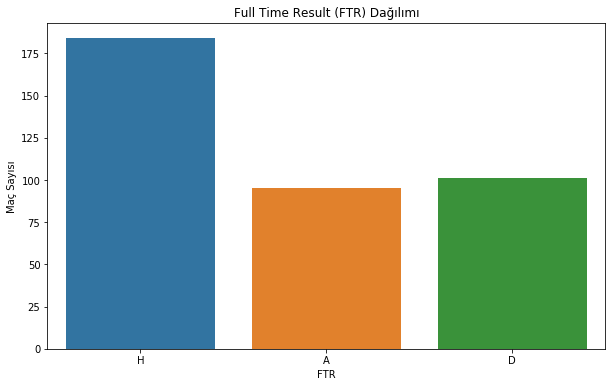

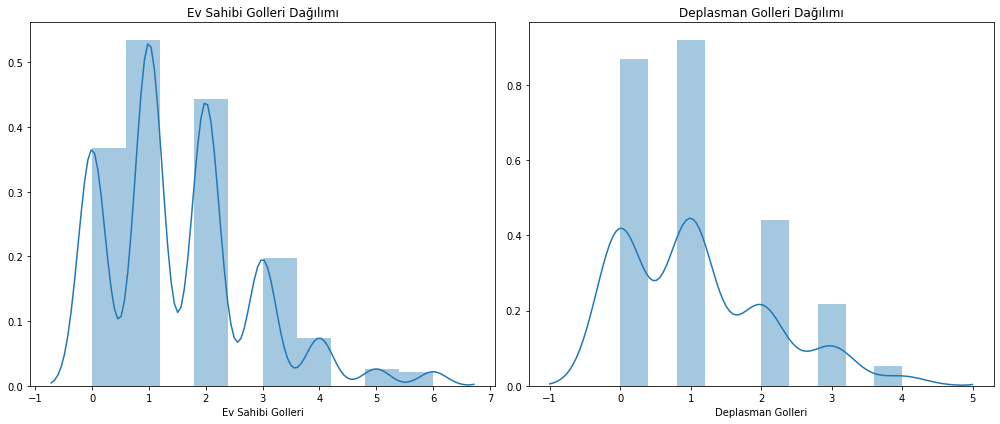

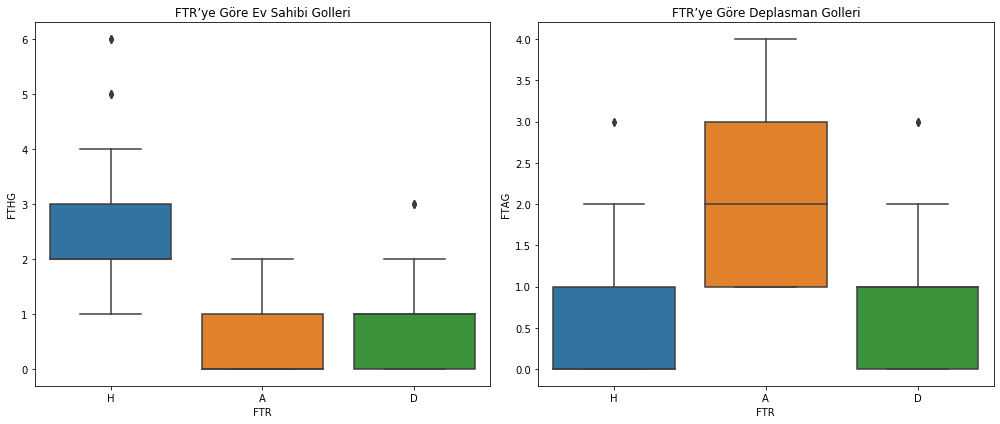

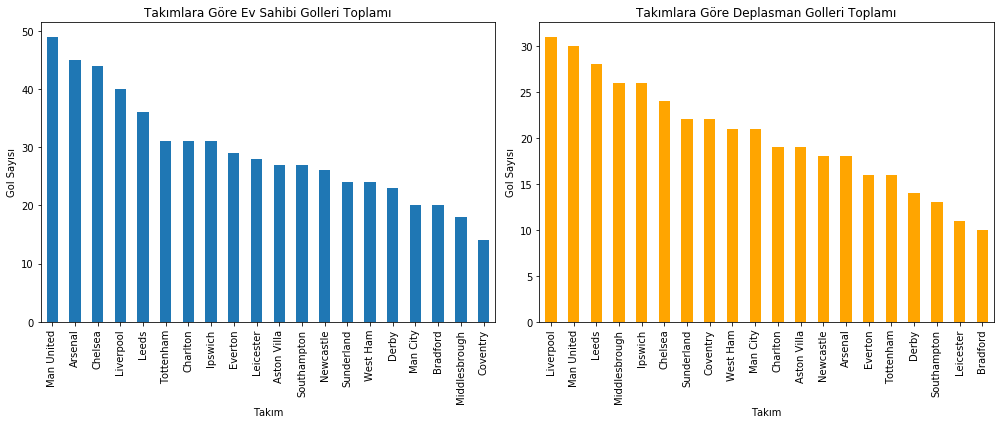

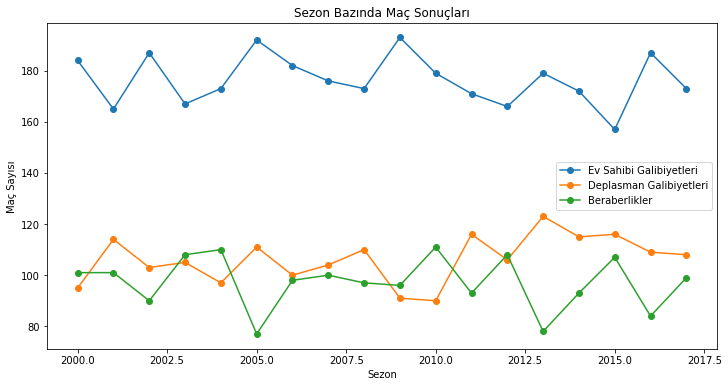

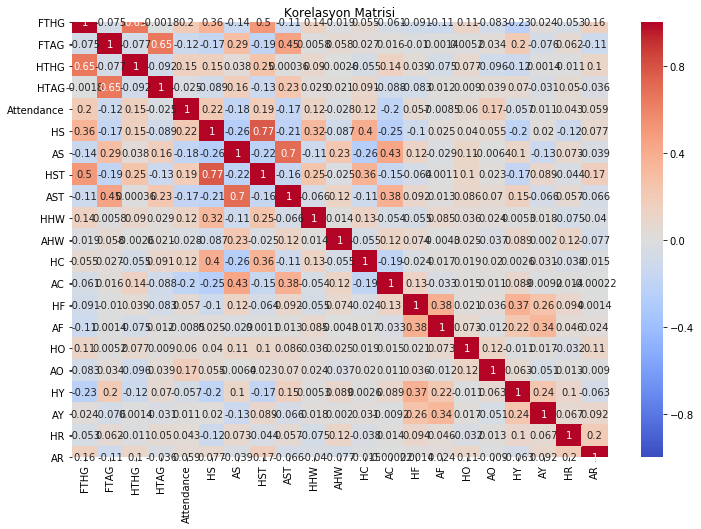

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Veri dosyalarının yüklenmesi
folder = 'C:/Users/GS65/Desktop/archive (1)/Datasets/'
data_files = [f'{folder}{year}.csv' for year in range(2000, 2018)]
raw_data = [pd.read_csv(file) for file in data_files]

# İlk veri kümesine göz atalım
df = raw_data[0]
print("İlk veri kümesine genel bakış:")
print(df.head())

# Veri türlerini kontrol edin
print("\nVeri türleri:")
print(df.dtypes)

# Eksik veri analizi
print("\nEksik veri analizi:")
print(df.isnull().sum())

# Yinelenen veri analizi
print("\nYinelenen veri analizi:")
duplicate_rows = df[df.duplicated()]
print(f"Yinelenen satır sayısı: {duplicate_rows.shape[0]}")

numeric_df = df.select_dtypes(include=['float64', 'int64'])
print("\nSayısal Sütunların Genel İstatistikleri:")
print(numeric_df.describe())

# Hedef değişken (FTR - Maç Sonucu) dağılımı
plt.figure(figsize=(10, 6))
sns.countplot(x='FTR', data=df)
plt.title('Full Time Result (FTR) Dağılımı')
plt.xlabel('FTR')
plt.ylabel('Maç Sayısı')
plt.show()

# Goller dağılımı
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.distplot(df['FTHG'], bins=10, kde=True)
plt.title('Ev Sahibi Golleri Dağılımı')
plt.xlabel('Ev Sahibi Golleri')

plt.subplot(1, 2, 2)
sns.distplot(df['FTAG'], bins=10, kde=True)
plt.title('Deplasman Golleri Dağılımı')
plt.xlabel('Deplasman Golleri')

plt.tight_layout()
plt.show()


# Maç sonuçlarına göre gollerin dağılımı
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='FTR', y='FTHG', data=df)
plt.title('FTR’ye Göre Ev Sahibi Golleri')

plt.subplot(1, 2, 2)
sns.boxplot(x='FTR', y='FTAG', data=df)
plt.title('FTR’ye Göre Deplasman Golleri')

plt.tight_layout()
plt.show()

# Takım bazında performans analizi
home_goals_by_team = df.groupby('HomeTeam')['FTHG'].sum().sort_values(ascending=False)
away_goals_by_team = df.groupby('AwayTeam')['FTAG'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
home_goals_by_team.plot(kind='bar')
plt.title('Takımlara Göre Ev Sahibi Golleri Toplamı')
plt.xlabel('Takım')
plt.ylabel('Gol Sayısı')

plt.subplot(1, 2, 2)
away_goals_by_team.plot(kind='bar', color='orange')
plt.title('Takımlara Göre Deplasman Golleri Toplamı')
plt.xlabel('Takım')
plt.ylabel('Gol Sayısı')

plt.tight_layout()
plt.show()

# Ev sahibi ve deplasman galibiyetlerinin sezon bazında analizi
home_wins = []
away_wins = []
draws = []

for data in raw_data:
    home_wins.append(len(data[data['FTR'] == 'H']))
    away_wins.append(len(data[data['FTR'] == 'A']))
    draws.append(len(data[data['FTR'] == 'D']))

seasons = list(range(2000, 2018))

plt.figure(figsize=(12, 6))
plt.plot(seasons, home_wins, marker='o', label='Ev Sahibi Galibiyetleri')
plt.plot(seasons, away_wins, marker='o', label='Deplasman Galibiyetleri')
plt.plot(seasons, draws, marker='o', label='Beraberlikler')
plt.title('Sezon Bazında Maç Sonuçları')
plt.xlabel('Sezon')
plt.ylabel('Maç Sayısı')
plt.legend()
plt.show()

corr = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelasyon Matrisi')
plt.show()


Pairplot Çizdirme

<Figure size 720x720 with 0 Axes>

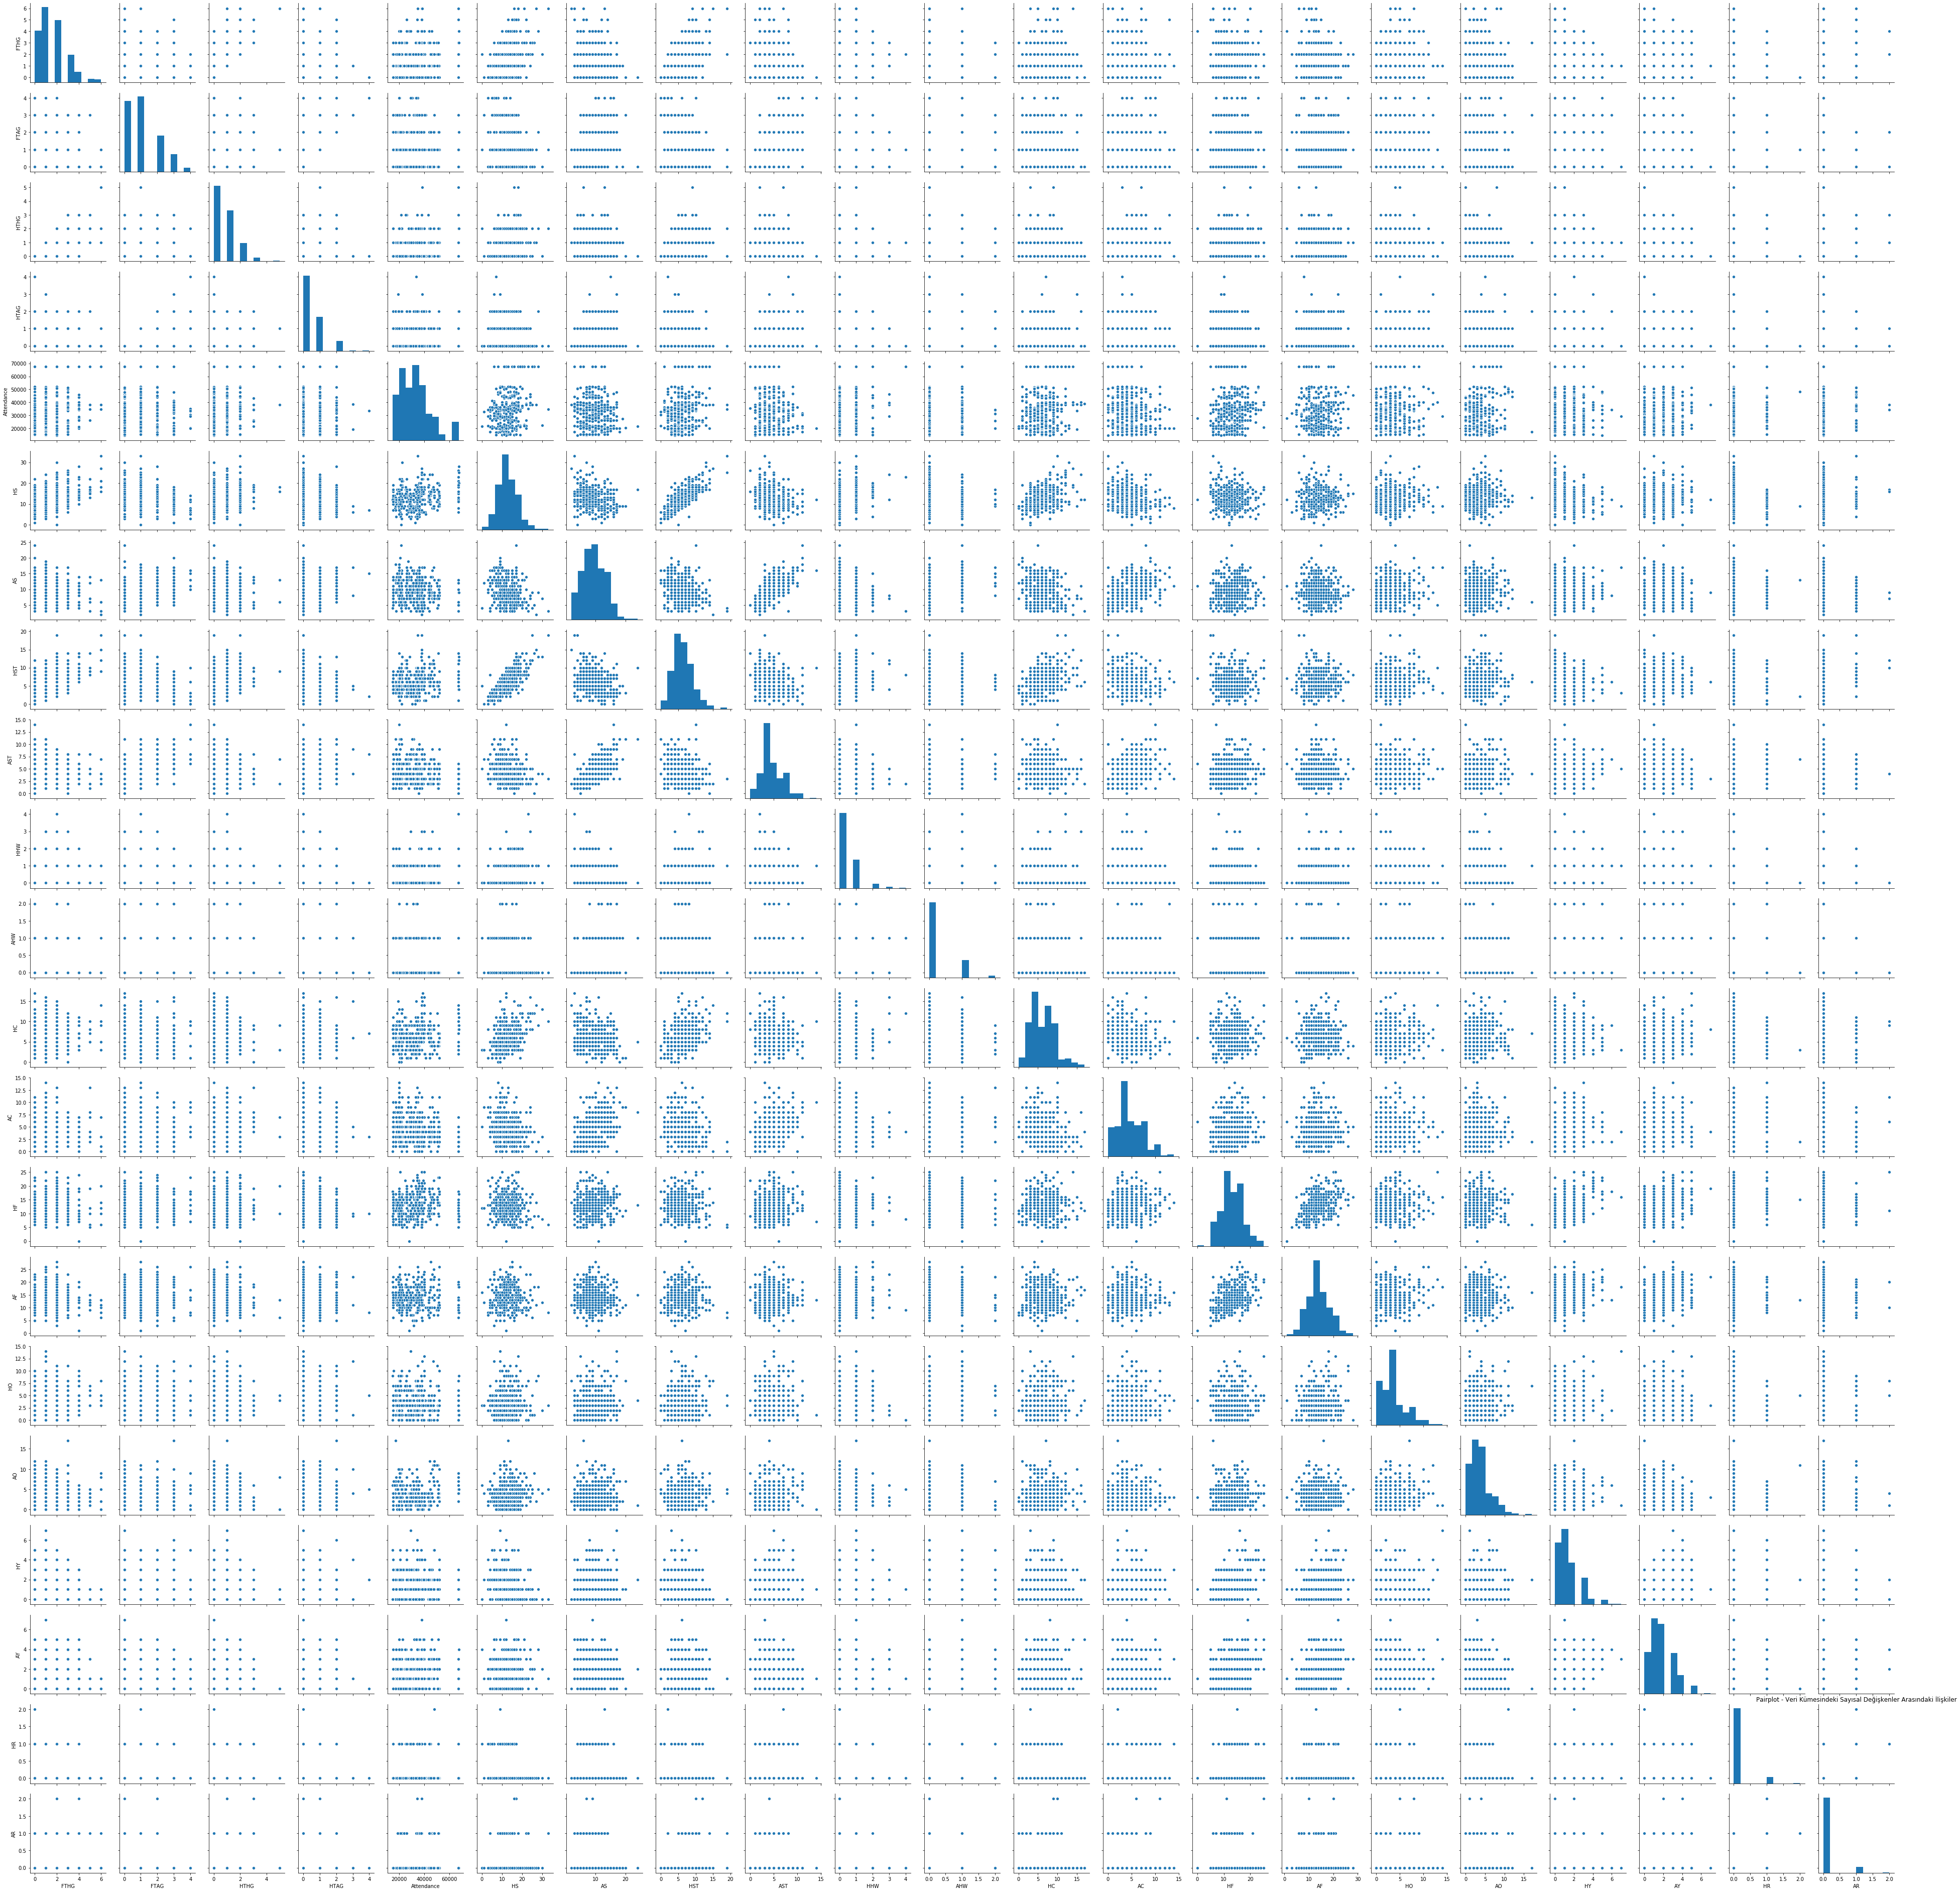

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot oluşturma
plt.figure(figsize=(10, 10))
sns.pairplot(df)
plt.title('Pairplot - Veri Kümesindeki Sayısal Değişkenler Arasındaki İlişkiler')
plt.show()


### Korelasyon matrisi oluşturalım:

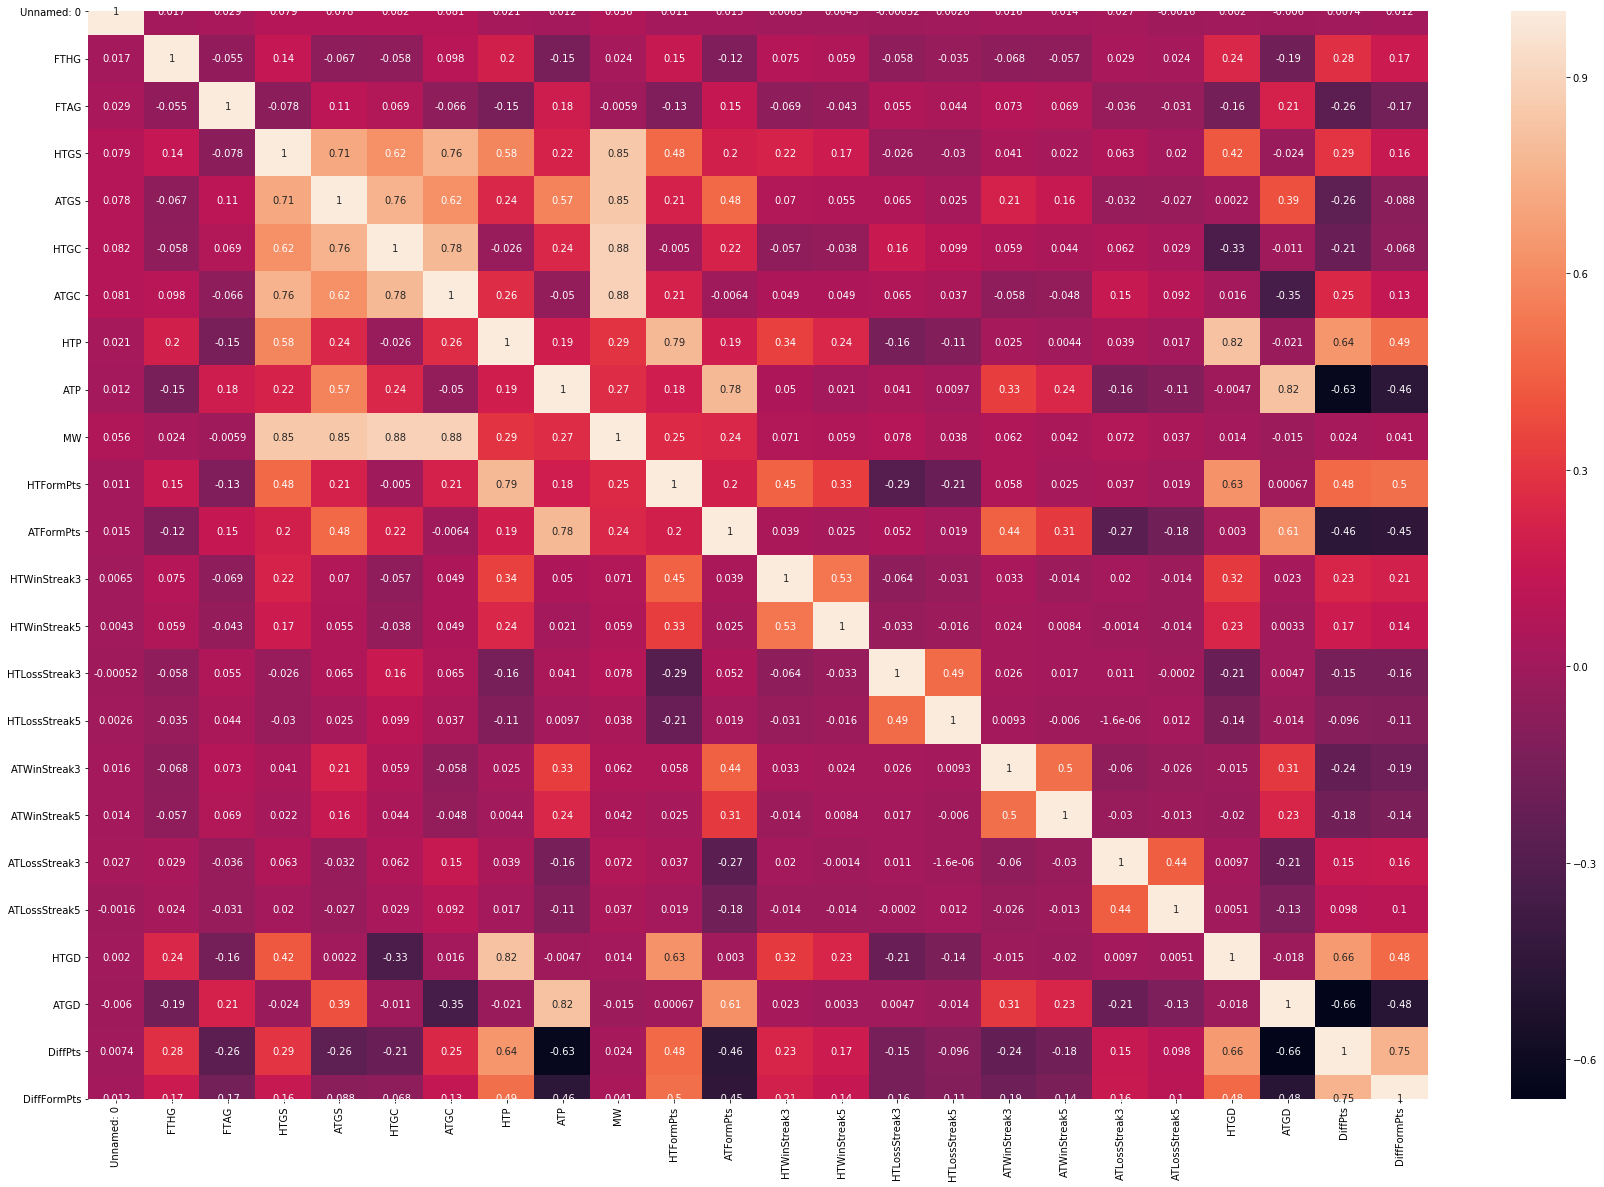

In [15]:
plt.figure(figsize=(30,20)) 
sns.heatmap(dataset.corr(), annot= True)

POZİTİF KORELASYON: Eğer bir A özelliğinin artışı, B özelliğinin de artışına yol açıyorsa, bu iki özellik pozitif korelasyon içindedir. 1 değeri mükemmel pozitif korelasyon anlamına gelir.

NEGATİF KORELASYON: Eğer bir A özelliğinin artışı, B özelliğinin azalmasına yol açıyorsa, bu iki özellik negatif korelasyon içindedir. -1 değeri mükemmel negatif korelasyon anlamına gelir.

Şimdi, iki özelliğin yüksek ya da mükemmel derecede korele olduğunu varsayalım; bu durumda birinin artışı diğerinin de artışına yol açar. Bu, her iki özelliğin de çok benzer bilgi içerdiği ve bilgi çeşitliliğinde çok az ya da hiç fark olmadığı anlamına gelir. Bu durum, her ikisi de neredeyse aynı bilgiyi içerdiği için MultiColinearity olarak bilinir.

In [16]:
# Yukarıdaki korelasyon matrisine göre bazı sütunları çıkaralım.
dataset_new = dataset.copy().drop(columns =['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'HTGS', 'ATGS', 'HTGC', 'ATGC',
       'HM4', 'HM5','AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
       'DiffPts'] )
dataset_new.keys()
dataset_new.head(10)

,Unnamed: 0,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts
0,0,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
1,1,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
2,2,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
3,3,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
4,4,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
5,5,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
6,6,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
7,7,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
8,8,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
9,9,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0


In [17]:
#Ev sahibi takımın maçı kazanma yüzdesi nedir?

# Total maç sayısı yazdıralım.
n_matches = dataset_new.shape[0]

# Feature'ları yazdıralım.
n_features = dataset_new.shape[1] - 1

# Ev sahibinin maç kazanma sayısını hesaplayalım.
n_homewins = len(dataset_new[dataset_new.FTR == 'H'])

# Ev sahibi takımın maçı kazanma yüzdesini hesaplayalım.
win_rate = (float(n_homewins) / (n_matches)) * 100

# Sonuçları yazdıralım.
print("Total number of matches: {}".format(n_matches))
print ("Number of features: {}".format(n_features))
print( "Number of matches won by home team: {}".format(n_homewins))
print ("Win rate of home team: {:.2f}%".format(win_rate))

Total number of matches: 6840
Number of features: 12
Number of matches won by home team: 3176
Win rate of home team: 46.43%


## Dataseti görselleştirelim:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022586D319C8>,
      dtype=object)

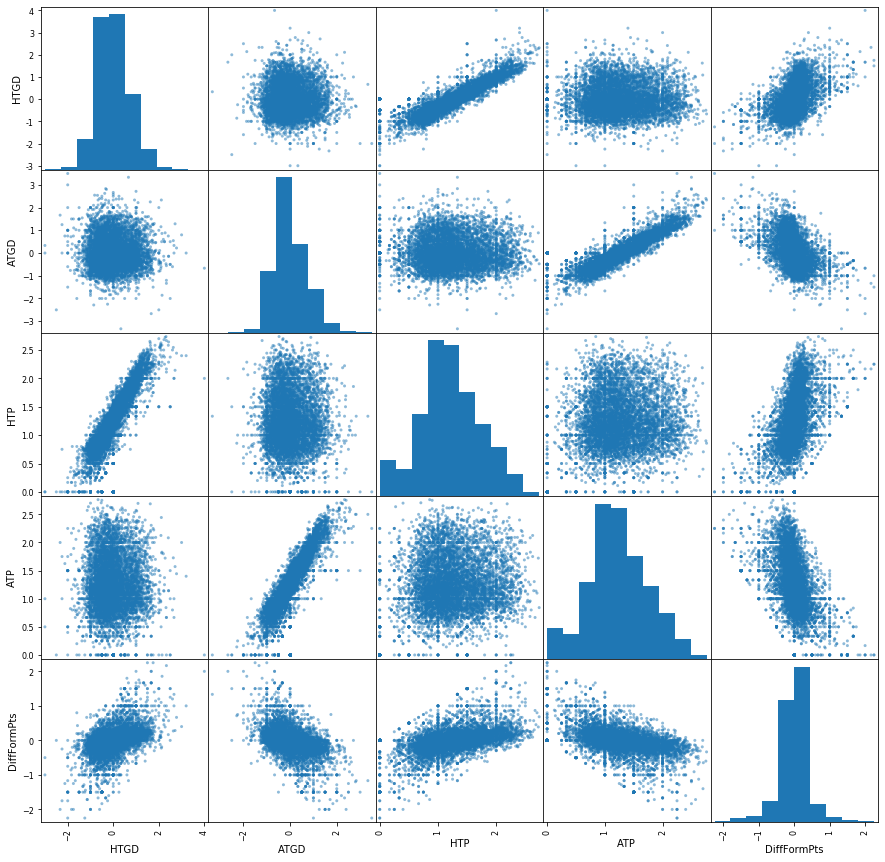

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset_new[['HTGD','ATGD','HTP','ATP','DiffFormPts']], figsize=(15,15))

Yeni Datasetin Correlation Matrixini Çıkartalım:

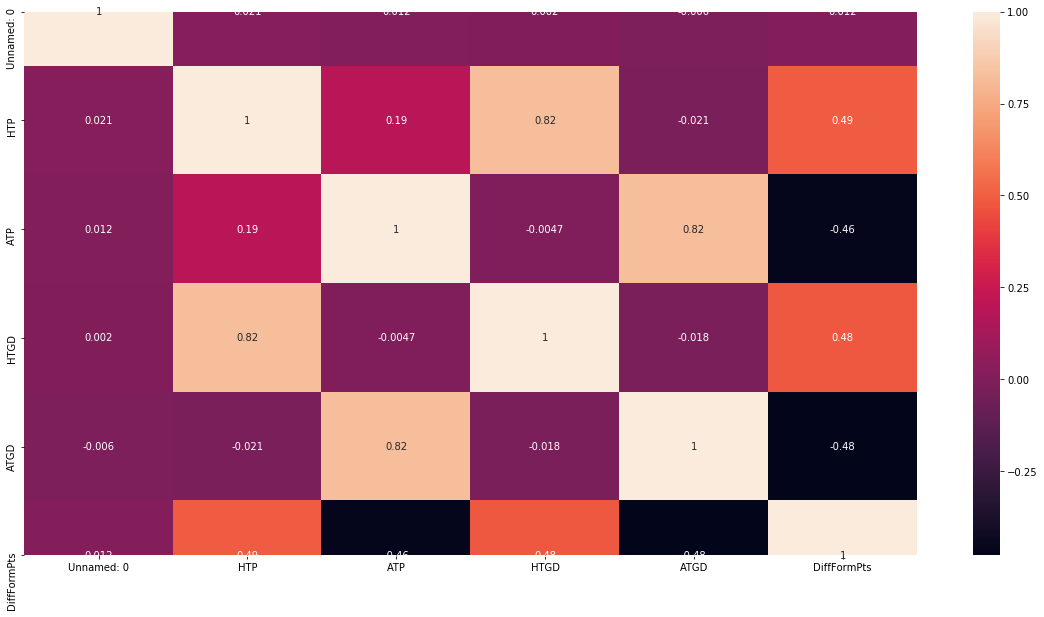

In [19]:
plt.figure(figsize=(20,10)) 
sns.heatmap(dataset_new.corr(), annot= True)

In [20]:
# Değişkenleri ayıralım.
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
X_all = dataset_new.drop(['FTR'],1)
y_all = dataset_new['FTR']

from sklearn.preprocessing import scale
cols = [['HTGD','ATGD','HTP','ATP']]
for col in cols:
    X_all[col] = scale(X_all[col])
    

c:\Users\GS65\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
#İki tarafın da son üç kazandığı maçı yazdıralım.
X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.AM1 = X_all.AM1.astype('str')
X_all.AM2 = X_all.AM2.astype('str')
X_all.AM3 = X_all.AM3.astype('str')

def preprocess_features(X):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''
    output = pd.DataFrame(index = X.index)
    for col, col_data in X.iteritems():
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print ("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))
X_all.head(10)

Processed feature columns (30 total features):
['Unnamed: 0', 'HTP', 'ATP', 'HM1_D', 'HM1_L', 'HM1_M', 'HM1_W', 'HM2_D', 'HM2_L', 'HM2_M', 'HM2_W', 'HM3_D', 'HM3_L', 'HM3_M', 'HM3_W', 'AM1_D', 'AM1_L', 'AM1_M', 'AM1_W', 'AM2_D', 'AM2_L', 'AM2_M', 'AM2_W', 'AM3_D', 'AM3_L', 'AM3_M', 'AM3_W', 'HTGD', 'ATGD', 'DiffFormPts']


,Unnamed: 0,HTP,ATP,HM1_D,HM1_L,HM1_M,HM1_W,HM2_D,HM2_L,HM2_M,...,AM2_L,AM2_M,AM2_W,AM3_D,AM3_L,AM3_M,AM3_W,HTGD,ATGD,DiffFormPts
0,0,-2.280523,-2.345017,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0.013972,-0.020983,0.0
1,1,-2.280523,-2.345017,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0.013972,-0.020983,0.0
2,2,-2.280523,-2.345017,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0.013972,-0.020983,0.0
3,3,-2.280523,-2.345017,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0.013972,-0.020983,0.0
4,4,-2.280523,-2.345017,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0.013972,-0.020983,0.0
5,5,-2.280523,-2.345017,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0.013972,-0.020983,0.0
6,6,-2.280523,-2.345017,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0.013972,-0.020983,0.0
7,7,-2.280523,-2.345017,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0.013972,-0.020983,0.0
8,8,-2.280523,-2.345017,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0.013972,-0.020983,0.0
9,9,-2.280523,-2.345017,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0.013972,-0.020983,0.0


## Dataseti test ve eğitim verilerini random olarak ayıralım.

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.25, random_state = 2, stratify = y_all)

c:\Users\GS65\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
c:\Users\GS65\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the releas

# Logistic Regression Uygulama

Eğitim Seti Doğruluğu: 64.95%
Test Seti Doğruluğu: 64.62%

Eğitim Seti Confusion Matrix:


c:\Users\GS65\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
c:\Users\GS65\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, e

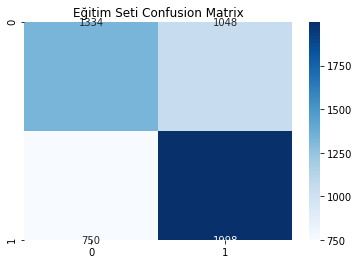

Eğitim Seti Classification Report:
              precision    recall  f1-score   support

           H       0.64      0.56      0.60      2382
          NH       0.66      0.73      0.69      2748

    accuracy                           0.65      5130
   macro avg       0.65      0.64      0.64      5130
weighted avg       0.65      0.65      0.65      5130


Test Seti Confusion Matrix:


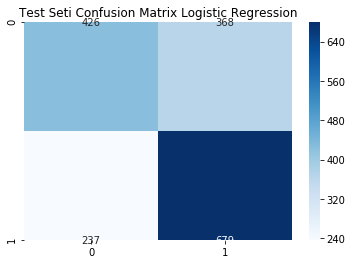

Test Seti Classification Report:
              precision    recall  f1-score   support

           H       0.64      0.54      0.58       794
          NH       0.65      0.74      0.69       916

    accuracy                           0.65      1710
   macro avg       0.65      0.64      0.64      1710
weighted avg       0.65      0.65      0.64      1710



In [23]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
Y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Eğitim seti için tahmin yapalım
y_train_pred = classifier.predict(X_train)

# Test seti için tahmin zaten yapılmıştı
y_test_pred = Y_pred

# Eğitim seti başarısı
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Eğitim Seti Doğruluğu: {:.2f}%".format(train_accuracy * 100))

# Test seti başarısı
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Seti Doğruluğu: {:.2f}%".format(test_accuracy * 100))

# Eğitim seti confusion matrix ve classification report
print("\nEğitim Seti Confusion Matrix:")
train_cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Eğitim Seti Confusion Matrix')
plt.show()

print("Eğitim Seti Classification Report:")
print(classification_report(y_train, y_train_pred))

# Test seti confusion matrix ve classification report
print("\nTest Seti Confusion Matrix:")
test_cm_lr = confusion_matrix(y_test, y_test_pred)
sns.heatmap(test_cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Test Seti Confusion Matrix Logistic Regression')
plt.show()

print("Test Seti Classification Report:")
print(classification_report(y_test, y_test_pred))


# SVM Uygulama

c:\Users\GS65\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Eğitim Seti Doğruluğu: 84.68%
Test Seti Doğruluğu: 52.81%

Eğitim Seti Confusion Matrix:


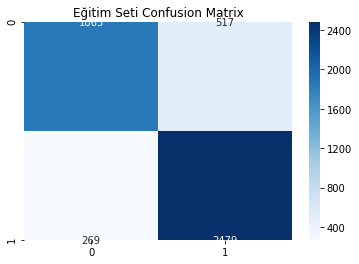

Eğitim Seti Classification Report:
              precision    recall  f1-score   support

           H       0.87      0.78      0.83      2382
          NH       0.83      0.90      0.86      2748

    accuracy                           0.85      5130
   macro avg       0.85      0.84      0.84      5130
weighted avg       0.85      0.85      0.85      5130


Test Seti Confusion Matrix:


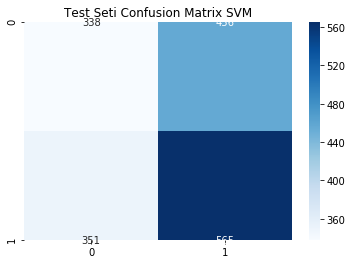

Test Seti Classification Report:
              precision    recall  f1-score   support

           H       0.49      0.43      0.46       794
          NH       0.55      0.62      0.58       916

    accuracy                           0.53      1710
   macro avg       0.52      0.52      0.52      1710
weighted avg       0.52      0.53      0.52      1710



In [24]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train, y_train)

Y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Eğitim seti için tahmin yapalım
y_train_pred = classifier.predict(X_train)

# Test seti için tahmin zaten yapılmıştı
y_test_pred = Y_pred

# Eğitim seti doğruluğu
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Eğitim Seti Doğruluğu: {:.2f}%".format(train_accuracy * 100))

# Test seti doğruluğu
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Seti Doğruluğu: {:.2f}%".format(test_accuracy * 100))

# Eğitim seti confusion matrix ve classification report
print("\nEğitim Seti Confusion Matrix:")
train_cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Eğitim Seti Confusion Matrix')
plt.show()

print("Eğitim Seti Classification Report:")
print(classification_report(y_train, y_train_pred))

# Test seti confusion matrix ve classification report
print("\nTest Seti Confusion Matrix:")
test_cm_svm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(test_cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Test Seti Confusion Matrix SVM')
plt.show()

print("Test Seti Classification Report:")
print(classification_report(y_test, y_test_pred))


# Random Forest Uygulama

c:\Users\GS65\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps
c:\Users\GS65\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
c:\Users\GS

Eğitim Seti Doğruluğu: 93.84%
Test Seti Doğruluğu: 63.80%

Eğitim Seti Confusion Matrix:


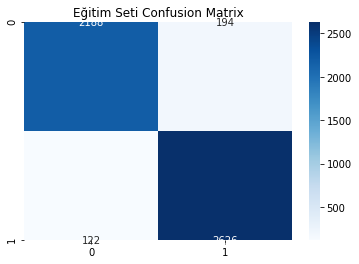

Eğitim Seti Classification Report:
              precision    recall  f1-score   support

           H       0.95      0.92      0.93      2382
          NH       0.93      0.96      0.94      2748

    accuracy                           0.94      5130
   macro avg       0.94      0.94      0.94      5130
weighted avg       0.94      0.94      0.94      5130


Test Seti Confusion Matrix:


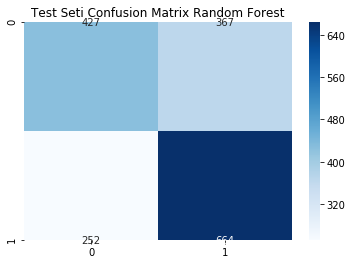

Test Seti Classification Report:
              precision    recall  f1-score   support

           H       0.63      0.54      0.58       794
          NH       0.64      0.72      0.68       916

    accuracy                           0.64      1710
   macro avg       0.64      0.63      0.63      1710
weighted avg       0.64      0.64      0.63      1710



In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='gini', n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
classifier.fit(X_train, y_train)

Y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Eğitim seti için tahmin yapalım
y_train_pred = classifier.predict(X_train)

# Test seti için tahmin zaten yapılmıştı
y_test_pred = Y_pred

# Eğitim seti doğruluğu
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Eğitim Seti Doğruluğu: {:.2f}%".format(train_accuracy * 100))

# Test seti doğruluğu
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Seti Doğruluğu: {:.2f}%".format(test_accuracy * 100))

# Eğitim seti confusion matrix ve classification report
print("\nEğitim Seti Confusion Matrix:")
train_cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Eğitim Seti Confusion Matrix')
plt.show()

print("Eğitim Seti Classification Report:")
print(classification_report(y_train, y_train_pred))

# Test seti confusion matrix ve classification report
print("\nTest Seti Confusion Matrix:")
test_cm_rf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(test_cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Test Seti Confusion Matrix Random Forest')
plt.show()

print("Test Seti Classification Report:")
print(classification_report(y_test, y_test_pred))

# Decision Tree Classifier Uygulama

Eğitim Seti Doğruluğu: 100.00%
Test Seti Doğruluğu: 57.25%

Eğitim Seti Confusion Matrix:


c:\Users\GS65\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


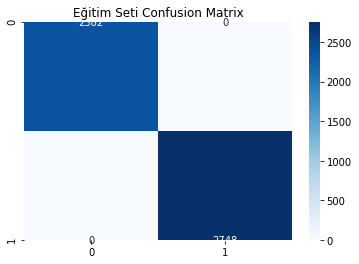

Eğitim Seti Classification Report:
              precision    recall  f1-score   support

           H       1.00      1.00      1.00      2382
          NH       1.00      1.00      1.00      2748

    accuracy                           1.00      5130
   macro avg       1.00      1.00      1.00      5130
weighted avg       1.00      1.00      1.00      5130


Test Seti Confusion Matrix Decision Tree:


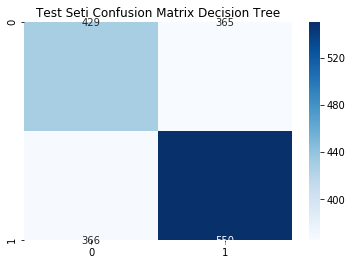

Test Seti Classification Report:
              precision    recall  f1-score   support

           H       0.54      0.54      0.54       794
          NH       0.60      0.60      0.60       916

    accuracy                           0.57      1710
   macro avg       0.57      0.57      0.57      1710
weighted avg       0.57      0.57      0.57      1710



In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Decision Tree Classifier oluşturma ve eğitme
classifier = DecisionTreeClassifier(criterion='gini', random_state=1)
classifier.fit(X_train, y_train)

# Eğitim seti için tahmin yapalım
y_train_pred = classifier.predict(X_train)

# Test seti için tahmin yapalım
y_test_pred = classifier.predict(X_test)

# Eğitim seti doğruluğu
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Eğitim Seti Doğruluğu: {:.2f}%".format(train_accuracy * 100))

# Test seti doğruluğu
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Seti Doğruluğu: {:.2f}%".format(test_accuracy * 100))

# Eğitim seti confusion matrix ve classification report
print("\nEğitim Seti Confusion Matrix:")
train_cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Eğitim Seti Confusion Matrix')
plt.show()

print("Eğitim Seti Classification Report:")
print(classification_report(y_train, y_train_pred))

# Test seti confusion matrix ve classification report
print("\nTest Seti Confusion Matrix Decision Tree:")
test_cm_dtc = confusion_matrix(y_test, y_test_pred)
sns.heatmap(test_cm_dtc, annot=True, fmt='d', cmap='Blues')
plt.title('Test Seti Confusion Matrix Decision Tree')
plt.show()

print("Test Seti Classification Report:")
print(classification_report(y_test, y_test_pred))


# K-nearest Neighbors Uygulama

c:\Users\GS65\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


Eğitim Seti Doğruluğu: 70.60%
Test Seti Doğruluğu: 50.64%

Eğitim Seti Confusion Matrix:


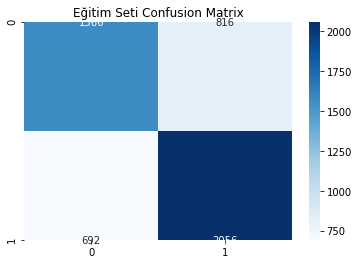

Eğitim Seti Classification Report:
              precision    recall  f1-score   support

           H       0.69      0.66      0.68      2382
          NH       0.72      0.75      0.73      2748

    accuracy                           0.71      5130
   macro avg       0.70      0.70      0.70      5130
weighted avg       0.71      0.71      0.71      5130


Test Seti Confusion Matrix KNN:


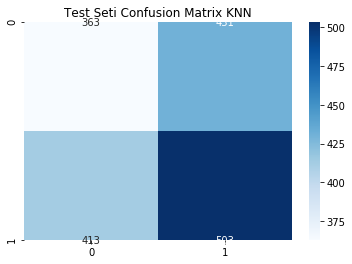

Test Seti Classification Report:
              precision    recall  f1-score   support

           H       0.47      0.46      0.46       794
          NH       0.54      0.55      0.54       916

    accuracy                           0.51      1710
   macro avg       0.50      0.50      0.50      1710
weighted avg       0.51      0.51      0.51      1710



In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# KNN modelini oluşturma ve eğitme
# n_neighbors parametresi K değerini belirler, burada 5 seçiyoruz
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

# Eğitim seti için tahmin yapalım
y_train_pred = classifier.predict(X_train)

# Test seti için tahmin yapalım
y_test_pred = classifier.predict(X_test)

# Eğitim seti doğruluğu
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Eğitim Seti Doğruluğu: {:.2f}%".format(train_accuracy * 100))

# Test seti doğruluğu
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Seti Doğruluğu: {:.2f}%".format(test_accuracy * 100))

# Eğitim seti confusion matrix ve classification report
print("\nEğitim Seti Confusion Matrix:")
train_cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Eğitim Seti Confusion Matrix')
plt.show()

print("Eğitim Seti Classification Report:")
print(classification_report(y_train, y_train_pred))

# Test seti confusion matrix ve classification report
print("\nTest Seti Confusion Matrix KNN:")
test_cm_knn = confusion_matrix(y_test, y_test_pred)
sns.heatmap(test_cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Test Seti Confusion Matrix KNN')
plt.show()

print("Test Seti Classification Report:")
print(classification_report(y_test, y_test_pred))


# Gradient Boost Classifier Uygulama

c:\Users\GS65\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1348: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.object)
c:\Users\GS65\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1570: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sample_mask = np.ones((n_samples, ), dtype=np.bool)
c:\Users\GS65\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1

Eğitim Seti Doğruluğu: 100.00%
Test Seti Doğruluğu: 100.00%

Eğitim Seti Confusion Matrix:


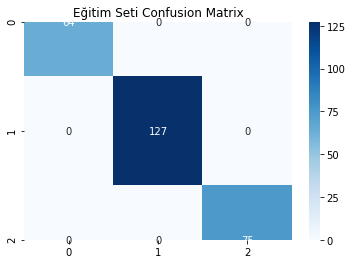

Eğitim Seti Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00       127
           2       1.00      1.00      1.00        75

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266


Test Seti Confusion Matrix Gradient Boost:


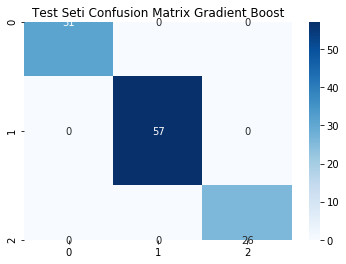

Test Seti Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        26

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier

# Veri dosyalarının yüklenmesi
folder = 'C:/Users/GS65/Desktop/archive (1)/Datasets/'
data_files = [f'{folder}{year}.csv' for year in range(2000, 2018)]
raw_data = [pd.read_csv(file) for file in data_files]

# İlk veri kümesine göz atalım
df = raw_data[0]

# Özellikler ve hedef değişken
features = ['FTHG', 'FTAG']  # Özellikler
target = 'FTR'  # Hedef değişken

X = df[features]
y = df[target]

# Hedef değişkeni kategorilere ayıralım (Binary sınıflama için 'H' ve 'A' sınıflarını kullanacağız)
y = y.map({'H': 1, 'A': 0, 'D': 2})  # Ev sahibi galibiyeti = 1, deplasman galibiyeti = 0, beraberlik = 2

# Veriyi eğitim ve test setlerine ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Özellikleri ölçeklendirelim
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Gradient Boosting Classifier Modeli Oluşturma
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)

# Modeli eğitelim
gb_model.fit(X_train, y_train)

# Eğitim ve test setleri için tahminler yapalım
y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)

# Eğitim seti doğruluğu
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Eğitim Seti Doğruluğu: {:.2f}%".format(train_accuracy * 100))

# Test seti doğruluğu
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Seti Doğruluğu: {:.2f}%".format(test_accuracy * 100))

# Eğitim seti confusion matrix ve classification report
print("\nEğitim Seti Confusion Matrix:")
train_cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Eğitim Seti Confusion Matrix')
plt.show()

print("Eğitim Seti Classification Report:")
print(classification_report(y_train, y_train_pred))

# Test seti confusion matrix ve classification report
print("\nTest Seti Confusion Matrix Gradient Boost:")
test_cm_gb = confusion_matrix(y_test, y_test_pred)
sns.heatmap(test_cm_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Test Seti Confusion Matrix Gradient Boost')
plt.show()

print("Test Seti Classification Report:")
print(classification_report(y_test, y_test_pred))


# Sonuç

Sonuçlara göre en iyi çalışan yöntem gradient boosting classifier olmuştur. Test verisi üzerinde %100 bir doğruluk ile çalışmıştır. Ancak bu iyi çalıştığı değil, overfit durumunda olduğu anlamına gelmektedir. Sonrasında Logistic Regression iyi çalışmıştır. Test verisi üzerinde %64.62 bir doğruluk ile çalışmıştır. Düşük gibi görünse de problemin futbol maç sonu tahmini olduğu hesaba katılınca güzel bir sonuç olduğu söylenebilir. Daha sonrasında Random Forest iyi çalışmıştır. Test verisi üzerinde %63.80 bir doğruluk ile vardır. Bunlardan sonra da sırasıyla %57.25 Decision Tree Classifier, %52.81 SVM, %50.64 K-Nearest Neighbors gelmektedir.